Your goals for this assignment are:
1.	Perform EDA on the data
2.	Show your findings about the data
3.	Preprocess the data if needed
4.	Create a regression model to predict the house price based on the features of the house
5.	Evaluate the model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv(r'G:/My Drive/Colab Notebooks/Homeworks/Homework Session 9 & 10/Housing.csv')

In [55]:
#Understanding data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [56]:
#Checking data summary
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [57]:
#Checking for duplicates
dupl = df[df.duplicated()]
dupl.shape

(0, 13)

In [4]:
#Renaming area to square foot, adding context with a unit of measurement
df = df.rename(columns={'area':'sqft'})

In [5]:
#Looking for NaN
df.isnull().sum()

price               0
sqft                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
df.head()

,price,sqft,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
#Converting categorical objects into numerical, including furnishingstatus

catname = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']

def objtonum(x) :
  return x.map({'yes': 1, 'no': 0,'furnished':1, 'semi-furnished':1, 'unfurnished':0})

df[catname] = df[catname].apply(objtonum)

In [10]:
df.head()

,price,sqft,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [11]:
#Rescaling variables, so the coefficients obtained later are on the same scale

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

quant_data = ['price','sqft','bedrooms','bathrooms','stories','parking']

df[quant_data] = scaler.fit_transform(df[quant_data])

In [12]:
df.head()

,price,sqft,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,1
1,0.909091,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,1
2,0.909091,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,1
3,0.906061,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,1
4,0.836364,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,1


In [13]:
#Dividing X-Y for training and testing data

x = df[['sqft','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']]

y = df['price']

In [14]:
#Splitting data, using the 20% as the test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [24]:
#Building the model, using LinearRegression

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)

print(model.coef_)

[0.31596241 0.05204354 0.25266717 0.1149313  0.03855427 0.03411966
 0.02165641 0.08614875 0.07834799 0.06086299 0.05788216 0.03238291]


In [34]:
#Displaying coefficients obtained

pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
sqft,0.315962
bedrooms,0.052044
bathrooms,0.252667
stories,0.114931
mainroad,0.038554
guestroom,0.034120
basement,0.021656
hotwaterheating,0.086149
airconditioning,0.078348
parking,0.060863


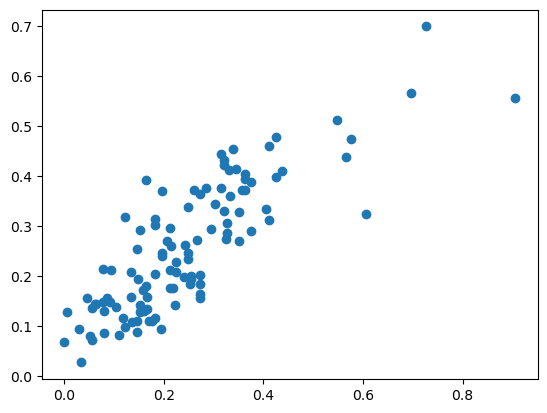

In [17]:
#Developing predictions based on predicted vs real values

predictions = model.predict(x_test)

plt.scatter(y_test, predictions)

(array([ 3.,  8., 23., 29., 27., 15.,  2.,  0.,  1.,  1.]),
 array([-0.2276765 , -0.17004962, -0.11242275, -0.05479587,  0.00283101,
         0.06045788,  0.11808476,  0.17571164,  0.23333851,  0.29096539,
         0.34859227]),
 <BarContainer object of 10 artists>)

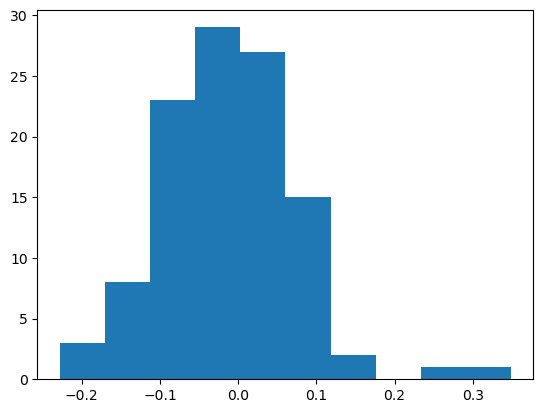

In [61]:
#Plotting residuals to assess model performance

plt.hist(y_test - predictions)

In [59]:
#Checking performance metrics of the developed model

from sklearn import metrics

print('MAE:',metrics.mean_absolute_error(y_test, predictions))
print('MSE:',metrics.mean_squared_error(y_test, predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.0653820949066898
MSE: 0.007423525649043001
RMSE: 0.0861598842213881
